In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import wandb


# matplotlib global settings
mpl.rcParams.update({
    "pdf.fonttype": 42,            # editable text in Adobe Illustrator
    "ps.fonttype": 42,             # editable text in Adobe Illustrator
    
    "figure.dpi": 200,
    "savefig.dpi": 600,              # very high-res when saving
    "savefig.format": "pdf",         # vector output preferred

    # Fonts
    "font.family": "serif",
    "font.serif": ["Times New Roman"],  # IEEE default

    # # Axes
    "axes.linewidth": 1.5,
    
    # Lines
    "lines.linewidth": 2,
})

/home/jmei13/0workspaces/drl_ws/DRL_RND/drl_env/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'repr' attribute with value False was provided to the `Field()` function, which has no effect in the context it was used. 'repr' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(
/home/jmei13/0workspaces/drl_ws/DRL_RND/drl_env/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'frozen' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'frozen' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. 

In [3]:
api = wandb.Api()
project_name = "meijunling-georgia-institute-of-technology/rnd_rl"
project = api.runs(project_name)


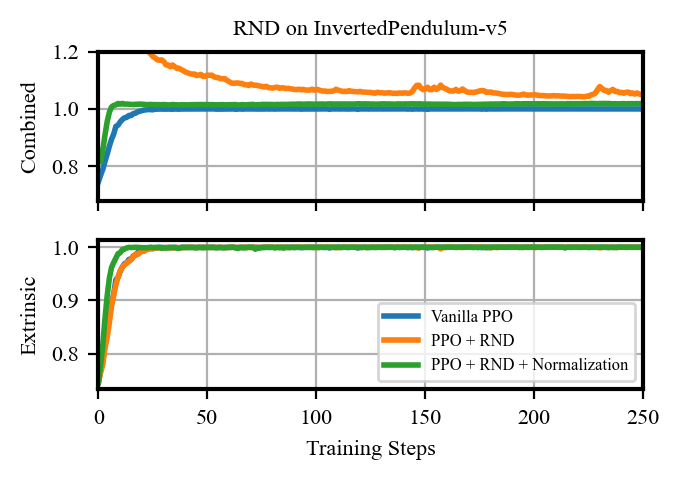

In [ ]:
fontsize=8
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(3.5, 2.5))

indices = [0,2,1] # change according to your wandb workspace
labels = ["Vanilla PPO", "PPO + RND", "PPO + RND + Normalization"]

for i in range(3):
    idx = indices[i]
    run = project[idx]
    df = run.history(samples=1000, pandas=True)
    ax1.plot(df['_step'], df['Reward'], label=labels[i])
    ax2.plot(df['_step'], df['Extrinsic Reward'], label=labels[i])

ax1.set_title("RND on InvertedPendulum-v5", fontsize=fontsize)
ax1.set_ylabel("Combined", fontsize=fontsize)
ax1.tick_params(axis='both', which='major', labelsize=fontsize)
ax1.set_xlim(0,250)
ax1.set_ylim(top=1.2)
ax1.grid()

ax2.set_ylabel("Extrinsic", fontsize=fontsize)
ax2.set_xlabel("Training Steps", fontsize=fontsize)
ax2.tick_params(axis='both', which='major', labelsize=fontsize)
ax2.set_xlim(0,250)
ax2.grid()

# ax2.legend(frameon=False)
ax2.legend(fontsize = 6)

plt.tight_layout()
# plt.savefig("training_rewards.pdf")
plt.show()

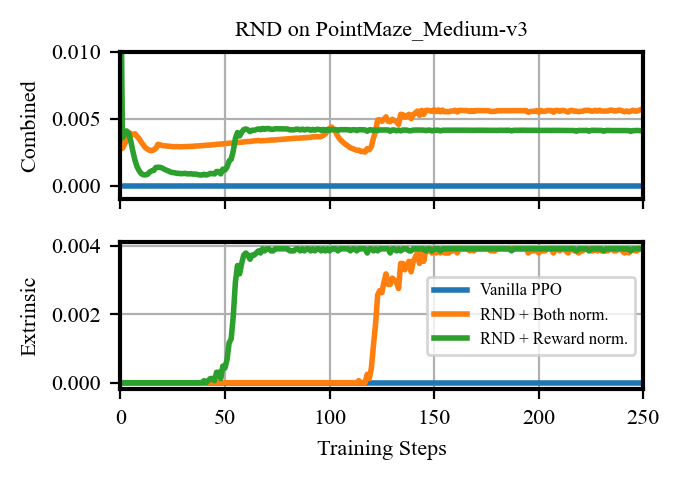

In [ ]:
fontsize=8
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True, figsize=(3.5, 2.5))

indices = [18,22,19] # change according to your wandb workspace
labels = ["Vanilla PPO", "RND + Both norm.", "RND + Reward norm."]

for i in range(3):
    idx = indices[i]
    run = project[idx]
    df = run.history(samples=1000, pandas=True)
    ax1.plot(df['_step'], df['Reward'], label=labels[i])
    ax2.plot(df['_step'], df['Extrinsic Reward'], label=labels[i])

ax1.set_title("RND on PointMaze_Medium-v3", fontsize=fontsize)
ax1.set_ylabel("Combined", fontsize=fontsize)
ax1.tick_params(axis='both', which='major', labelsize=fontsize)
ax1.set_xlim(0,250)
ax1.set_ylim(top=0.01)
ax1.grid()

ax2.set_ylabel("Extrinsic", fontsize=fontsize)
ax2.set_xlabel("Training Steps", fontsize=fontsize)
ax2.tick_params(axis='both', which='major', labelsize=fontsize)
ax2.set_xlim(0,250)
ax2.grid()

# ax2.legend(frameon=False)
ax2.legend(loc = "center right", fontsize = 6)

plt.tight_layout()
# plt.savefig("training_rewards.pdf")
plt.show()